# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
ages = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]

In [11]:
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [12]:
student_data = pd.DataFrame({'X': ages, 'Y': tardies})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

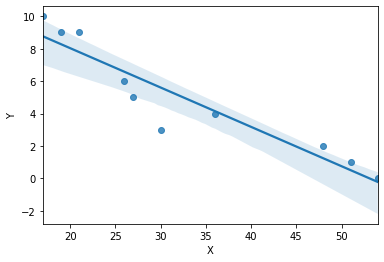

In [19]:
sns.regplot(x='X', y= 'Y', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# It looks like tardies decrease as age increases. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [53]:
# Covariance
student_data.cov()
# Covariance is a statistical measure of association between two variables X and Y
# each variable is centered by subtracting its mean. These centered scores are multiplied together to
# measure whether the increase in one variable associates with the increase in another. Finally, the mean of the
# product of these centered scores is calculated as a summary of association

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [27]:
# Correlation
student_data.corr()
# correlation measures the strength of association between two variables and the direction of the relationship
# it is calculated by dividing the covariance of 2 variables and dividing it by the product of their standard deviations
# here there is a negative relationship between the variables, which means that as one increases, the other decreases. 
# it is close to 1, so they are very strongly associated

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [73]:
lr = LinearRegression()

In [74]:
X = student_data['X']

In [75]:
X = X.values.reshape(-1,1)

In [76]:
y = student_data['Y'].values

In [77]:
lr.fit(X, y)

LinearRegression()

In [78]:
lr.score(X, y)

0.8820265558250109

In [95]:
y_pred = lr.predict(X)

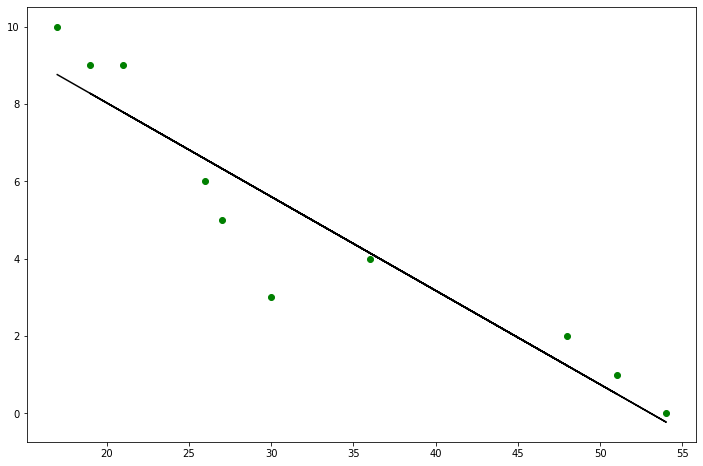

In [96]:
plt.scatter(X, y,color='g')
plt.plot(X, y_pred,color='k')

Plot your regression model on your scatter plot.

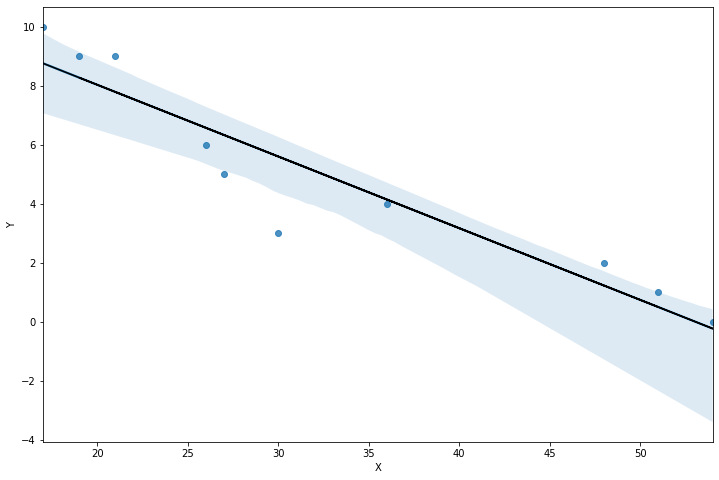

In [97]:
sns.regplot(x='X', y= 'Y', data=student_data)
plt.plot(X, y_pred,color='k')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [105]:
# The R2 is 0.8820265558250109, quite close to 1, which means more than 88% of the variance is explained by
# the other variable. The model should be fine-tuned to get closer to 90%, but we can conclude it is a good
# model and that age is a good predictor of tardiness. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [109]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [112]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

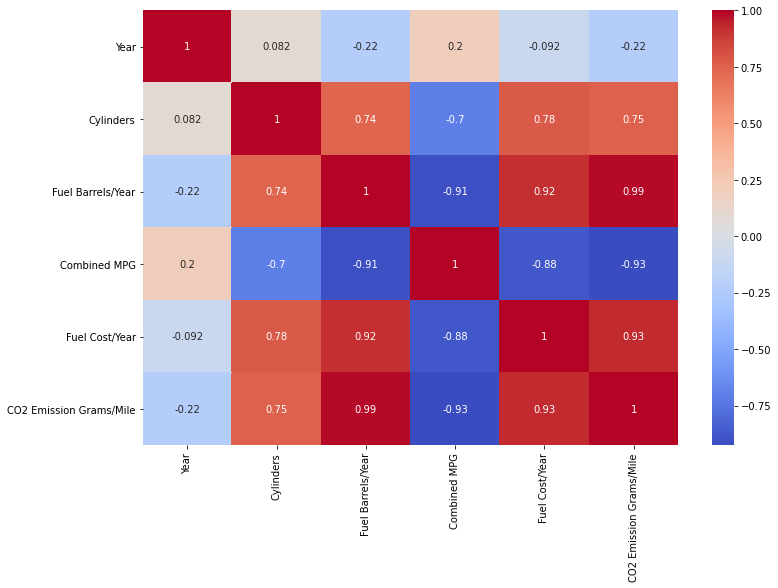

In [113]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(data=vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr(), 
            annot=True, cmap='coolwarm')
# the most important variable in determining CO2 emissions is Fuel Barrels/Year
# the least important one is the year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [164]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

In [165]:
y = vehicles['CO2 Emission Grams/Mile']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [171]:
lr2.score(X_test, y_test)
# the R2 is very close to 1, so we can be very confident is this model. 

0.9816221846322115

In [169]:
[(col, cf) for col, cf in zip(X.columns, lr2.coef_)]
# As expected, the most important variable is Fuel Barrels/Year, since the model has assigned it the highes coefficient

[('Year', -0.33334129878017327),
 ('Cylinders', 1.9259036040114954),
 ('Fuel Barrels/Year', 18.927975550881094),
 ('Combined MPG', -3.02876609402252),
 ('Fuel Cost/Year', 0.033188566229312544)]

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 